# GelMA SMPEG2 des04c1

In [1]:
import pandas as pd

In [2]:
from sklearn import preprocessing

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Parameters and Data Import

In [4]:
pi = 3.141592653589793238

In [6]:
GelMA16 = pd.read_csv("GelMA16.csv")
GelMA16_H = 3.91
GelMA16_D = 18.14/1000
GelMA16_R = GelMA16_D/2

GelMA17 = pd.read_csv("GelMA17.csv")
GelMA17_H = 4.10
GelMA17_D = 16.95/1000
GelMA17_R = GelMA17_D/2

GelMA18 = pd.read_csv("GelMA18.csv")
GelMA18_H = 4.92
GelMA18_D = 17.82/1000
GelMA18_R = GelMA18_D/2

GelMA19 = pd.read_csv("GelMA19.csv")
GelMA19_H = 4.37
GelMA19_D = 17.18/1000
GelMA19_R = GelMA19_D/2

GelMA20 = pd.read_csv("GelMA20.csv")
GelMA20_H = 4.92
GelMA20_D = 17.95/1000
GelMA20_R = GelMA20_D/2


In [7]:
GelMA16.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA17.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA18.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA19.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

GelMA20.rename(columns={"Force":"Force [N]",
                "Stroke":"Stroke [mm]", "Time":"Time [sec]"}
          ,inplace=True)

In [8]:
GelMA20

,Time [sec],Force [N],Stroke [mm]
0,0.00,-0.000318,0.000000
1,0.01,-0.000715,0.000000
2,0.02,-0.000556,0.000033
3,0.03,-0.000159,0.000033
4,0.04,0.000238,0.000100
...,...,...,...
19502,195.02,2.177397,3.250300
19503,195.03,2.178033,3.250500
19504,195.04,2.178748,3.250667
19505,195.05,2.179305,3.250733


## Stress and Strain Calculation

In [9]:
GelMA16['Engineering Strain'] = GelMA16['Stroke [mm]']/ GelMA16_H 
GelMA16['Stress [Pa]'] = GelMA16['Force [N]']/(pi*GelMA16_R**2)

GelMA17['Engineering Strain'] = GelMA17['Stroke [mm]']/ GelMA17_H 
GelMA17['Stress [Pa]'] = GelMA17['Force [N]']/(pi*GelMA17_R**2)

GelMA18['Engineering Strain'] = GelMA18['Stroke [mm]']/ GelMA18_H 
GelMA18['Stress [Pa]'] = GelMA18['Force [N]']/(pi*GelMA18_R**2)

GelMA19['Engineering Strain'] = GelMA19['Stroke [mm]']/ GelMA19_H 
GelMA19['Stress [Pa]'] = GelMA19['Force [N]']/(pi*GelMA19_R**2)

GelMA20['Engineering Strain'] = GelMA20['Stroke [mm]']/ GelMA20_H 
GelMA20['Stress [Pa]'] = GelMA20['Force [N]']/(pi*GelMA20_R**2)



GelMA16['Engineering Strain'] = GelMA16['Stroke [mm]']/ GelMA16_H 
GelMA16['Stress [kPa]'] = (GelMA16['Force [N]']/(pi*GelMA16_R**2))/1000

GelMA17['Engineering Strain'] = GelMA17['Stroke [mm]']/ GelMA17_H 
GelMA17['Stress [kPa]'] = (GelMA17['Force [N]']/(pi*GelMA17_R**2))/1000

GelMA18['Engineering Strain'] = GelMA18['Stroke [mm]']/ GelMA18_H 
GelMA18['Stress [kPa]'] = (GelMA18['Force [N]']/(pi*GelMA18_R**2))/1000

GelMA19['Engineering Strain'] = GelMA19['Stroke [mm]']/ GelMA19_H 
GelMA19['Stress [kPa]'] = (GelMA19['Force [N]']/(pi*GelMA19_R**2))/1000

GelMA20['Engineering Strain'] = GelMA20['Stroke [mm]']/ GelMA20_H 
GelMA20['Stress [kPa]'] = (GelMA20['Force [N]']/(pi*GelMA20_R**2))/1000

In [10]:
GelMA20

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa]
0,0.00,-0.000318,0.000000,0.000000,-1.256203,-0.001256
1,0.01,-0.000715,0.000000,0.000000,-2.826458,-0.002826
2,0.02,-0.000556,0.000033,0.000007,-2.198356,-0.002198
3,0.03,-0.000159,0.000033,0.000007,-0.628102,-0.000628
4,0.04,0.000238,0.000100,0.000020,0.942153,0.000942
...,...,...,...,...,...,...
19502,195.02,2.177397,3.250300,0.660630,8604.365159,8.604365
19503,195.03,2.178033,3.250500,0.660671,8606.878424,8.606878
19504,195.04,2.178748,3.250667,0.660705,8609.703871,8.609704
19505,195.05,2.179305,3.250733,0.660718,8611.904954,8.611905


## Cutting the Data 

In [11]:
GelMA16_cut = GelMA16[~(GelMA16['Force [N]']<= 0.1)]

GelMA17_cut = GelMA17[~(GelMA17['Force [N]']<= 0.1)]

GelMA18_cut = GelMA18[~(GelMA18['Force [N]']<= 0.1)]

GelMA19_cut = GelMA19[~(GelMA19['Force [N]']<= 0.1)]

GelMA20_cut = GelMA20[~(GelMA20['Force [N]']<= 0.1)]

In [12]:
GelMA20_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa]
2406,24.06,0.101089,0.400967,0.081497,399.472844,0.399473
2407,24.07,0.102520,0.401100,0.081524,405.125715,0.405126
2408,24.08,0.101725,0.401267,0.081558,401.985319,0.401985
2409,24.09,0.100374,0.401433,0.081592,396.646211,0.396646
2415,24.15,0.100931,0.402433,0.081795,398.844527,0.398845
...,...,...,...,...,...,...
19502,195.02,2.177397,3.250300,0.660630,8604.365159,8.604365
19503,195.03,2.178033,3.250500,0.660671,8606.878424,8.606878
19504,195.04,2.178748,3.250667,0.660705,8609.703871,8.609704
19505,195.05,2.179305,3.250733,0.660718,8611.904954,8.611905


In [13]:
GelMA16_cut['Strain Normalised'] = GelMA16_cut['Engineering Strain'] - GelMA16_cut.iloc[0]['Engineering Strain']

GelMA17_cut['Strain Normalised'] = GelMA17_cut['Engineering Strain'] - GelMA17_cut.iloc[0]['Engineering Strain']

GelMA18_cut['Strain Normalised'] = GelMA18_cut['Engineering Strain'] - GelMA18_cut.iloc[0]['Engineering Strain']

GelMA19_cut['Strain Normalised'] = GelMA19_cut['Engineering Strain'] - GelMA19_cut.iloc[0]['Engineering Strain']

GelMA20_cut['Strain Normalised'] = GelMA20_cut['Engineering Strain'] - GelMA20_cut.iloc[0]['Engineering Strain']

GelMA20_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/1084320774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA16_cut['Strain Normalised'] = GelMA16_cut['Engineering Strain'] - GelMA16_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/1084320774.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA17_cut['Strain Normalised'] = GelMA17_cut['Engineering Strain'] - GelMA17_cut.iloc[0]['Engineering Strain']
/var/folders/97/y1n8_jns6rl_dk0y

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised
2406,24.06,0.101089,0.400967,0.081497,399.472844,0.399473,0.000000
2407,24.07,0.102520,0.401100,0.081524,405.125715,0.405126,0.000027
2408,24.08,0.101725,0.401267,0.081558,401.985319,0.401985,0.000061
2409,24.09,0.100374,0.401433,0.081592,396.646211,0.396646,0.000095
2415,24.15,0.100931,0.402433,0.081795,398.844527,0.398845,0.000298
...,...,...,...,...,...,...,...
19502,195.02,2.177397,3.250300,0.660630,8604.365159,8.604365,0.579133
19503,195.03,2.178033,3.250500,0.660671,8606.878424,8.606878,0.579173
19504,195.04,2.178748,3.250667,0.660705,8609.703871,8.609704,0.579207
19505,195.05,2.179305,3.250733,0.660718,8611.904954,8.611905,0.579221


In [14]:
GelMA16_cut['Stroke Normalised'] = GelMA16_cut['Stroke [mm]'] - GelMA16_cut.iloc[0]['Stroke [mm]']

GelMA17_cut['Stroke Normalised'] = GelMA17_cut['Stroke [mm]'] - GelMA17_cut.iloc[0]['Stroke [mm]']

GelMA18_cut['Stroke Normalised'] = GelMA18_cut['Stroke [mm]'] - GelMA18_cut.iloc[0]['Stroke [mm]']

GelMA19_cut['Stroke Normalised'] = GelMA19_cut['Stroke [mm]'] - GelMA19_cut.iloc[0]['Stroke [mm]']

GelMA20_cut['Stroke Normalised'] = GelMA20_cut['Stroke [mm]'] - GelMA20_cut.iloc[0]['Stroke [mm]']

GelMA20_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/1459342116.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA16_cut['Stroke Normalised'] = GelMA16_cut['Stroke [mm]'] - GelMA16_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/1459342116.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA17_cut['Stroke Normalised'] = GelMA17_cut['Stroke [mm]'] - GelMA17_cut.iloc[0]['Stroke [mm]']
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised
2406,24.06,0.101089,0.400967,0.081497,399.472844,0.399473,0.000000,0.000000
2407,24.07,0.102520,0.401100,0.081524,405.125715,0.405126,0.000027,0.000133
2408,24.08,0.101725,0.401267,0.081558,401.985319,0.401985,0.000061,0.000300
2409,24.09,0.100374,0.401433,0.081592,396.646211,0.396646,0.000095,0.000467
2415,24.15,0.100931,0.402433,0.081795,398.844527,0.398845,0.000298,0.001467
...,...,...,...,...,...,...,...,...
19502,195.02,2.177397,3.250300,0.660630,8604.365159,8.604365,0.579133,2.849333
19503,195.03,2.178033,3.250500,0.660671,8606.878424,8.606878,0.579173,2.849533
19504,195.04,2.178748,3.250667,0.660705,8609.703871,8.609704,0.579207,2.849700
19505,195.05,2.179305,3.250733,0.660718,8611.904954,8.611905,0.579221,2.849766


### Plotting Force and Stroke Normalised 

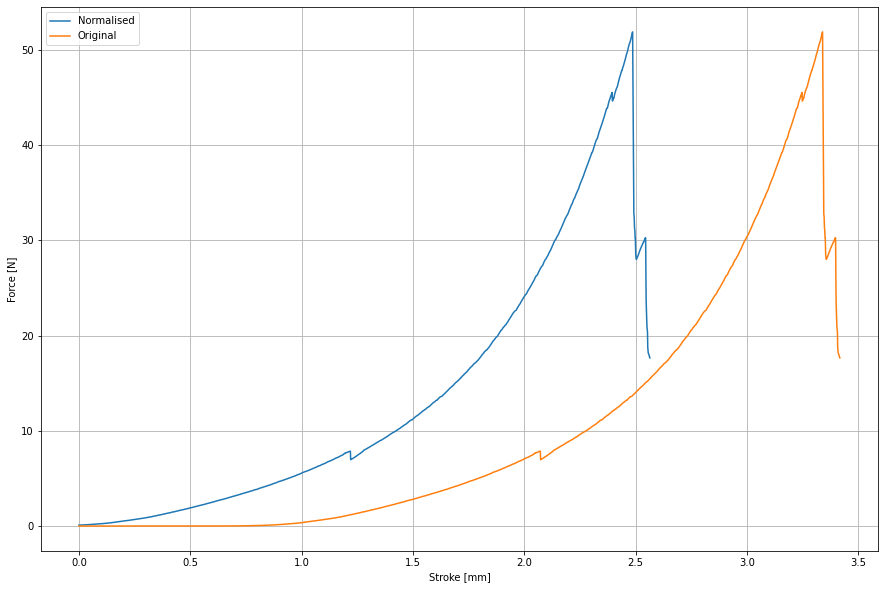

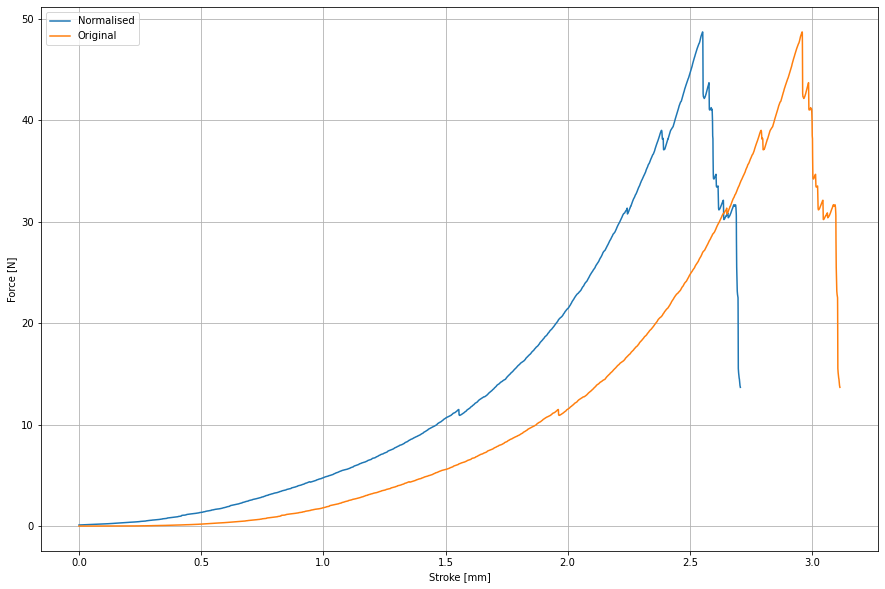

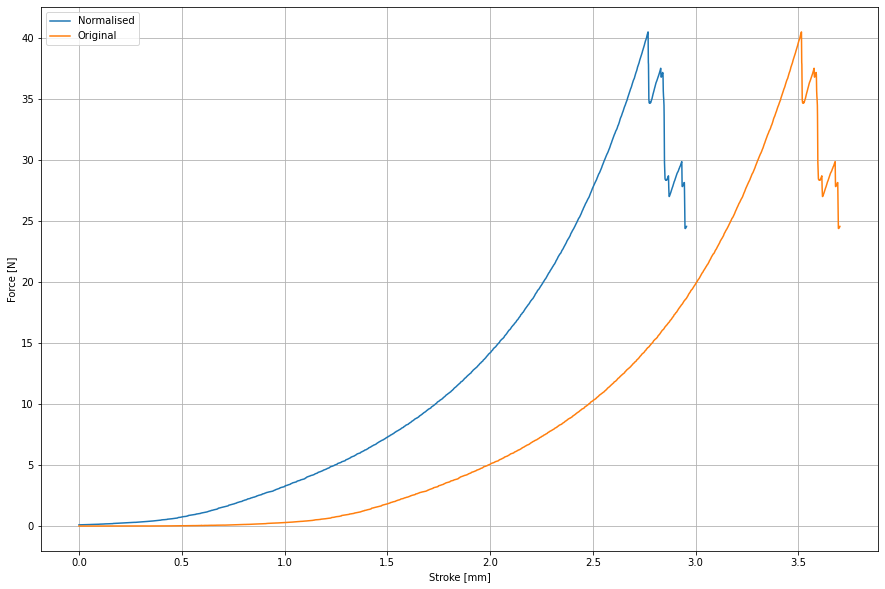

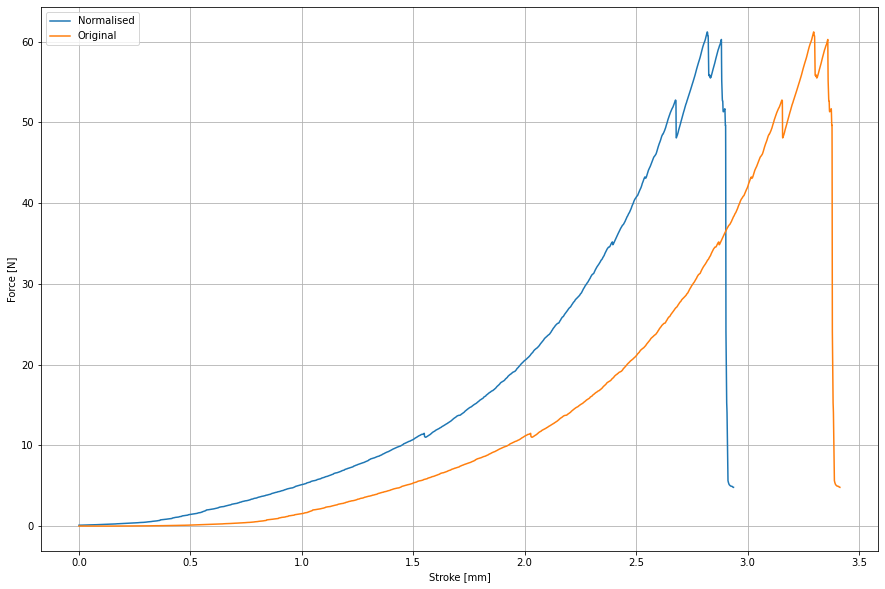

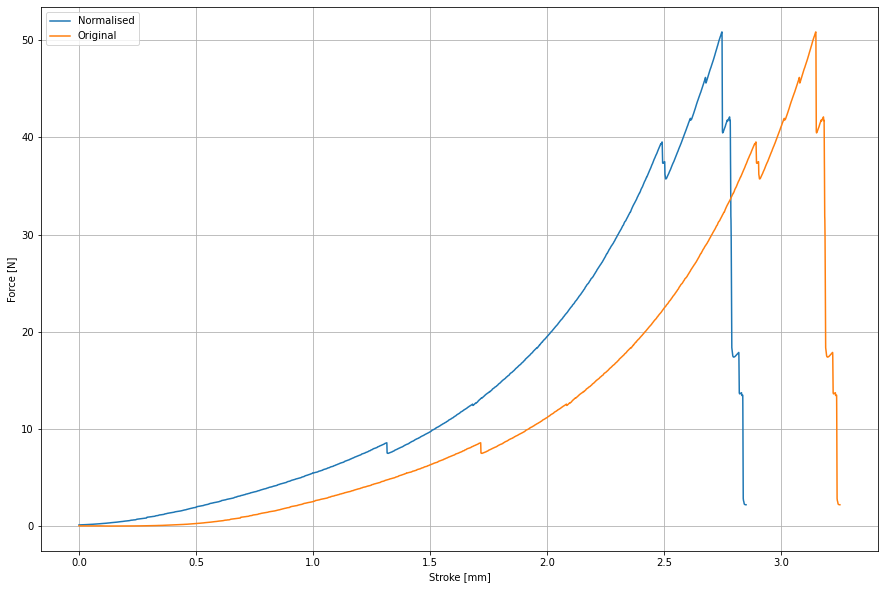

In [15]:
axA = GelMA16_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA16.plot(ax = axA, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axB = GelMA17_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA17.plot(ax = axB, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axC = GelMA18_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA18.plot(ax = axC, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axD = GelMA19_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA19.plot(ax = axD, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
plt.show()

axE = GelMA20_cut.plot(y= 'Force [N]', x = 'Stroke Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA20.plot(ax = axE, y = 'Force [N]', ylabel = "Force [N]", x = 'Stroke [mm]', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()


### Plotting Stress and Strain Normalised 

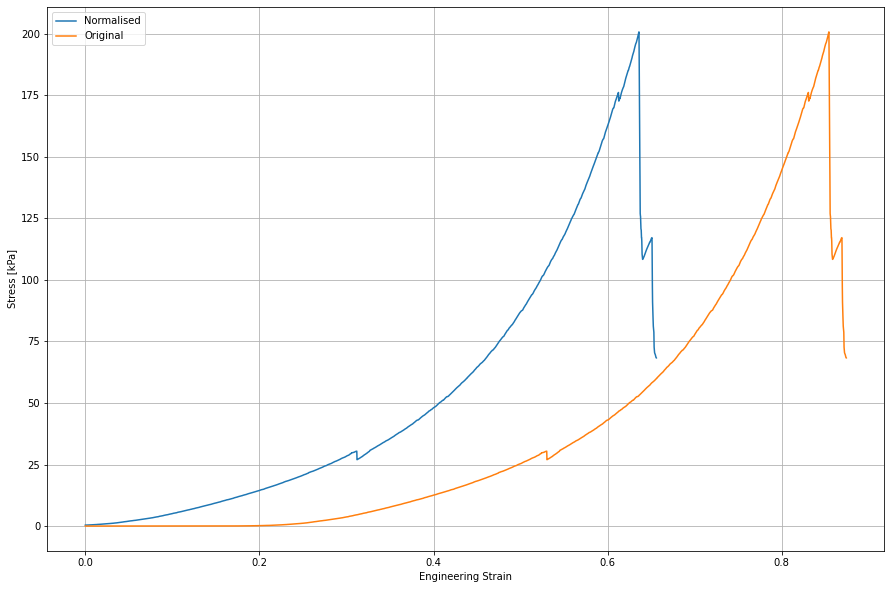

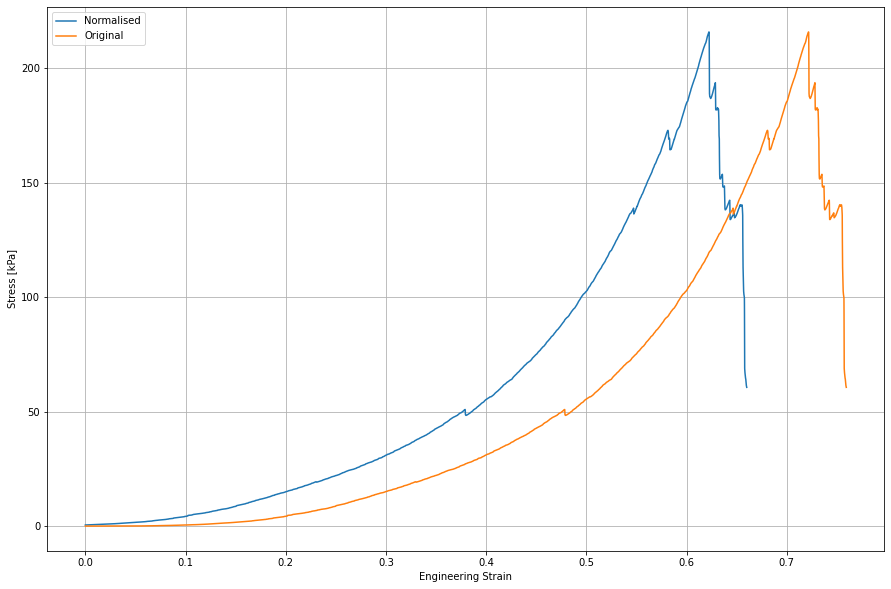

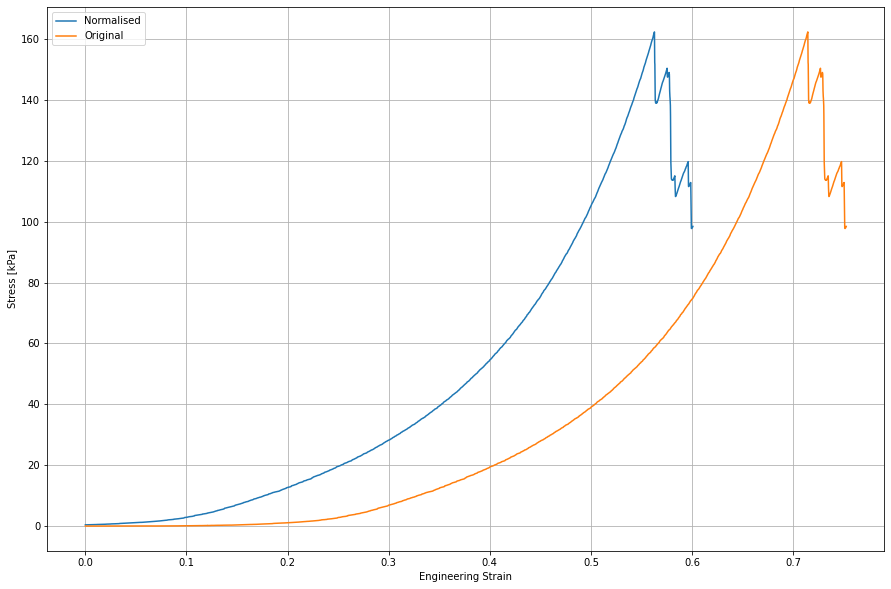

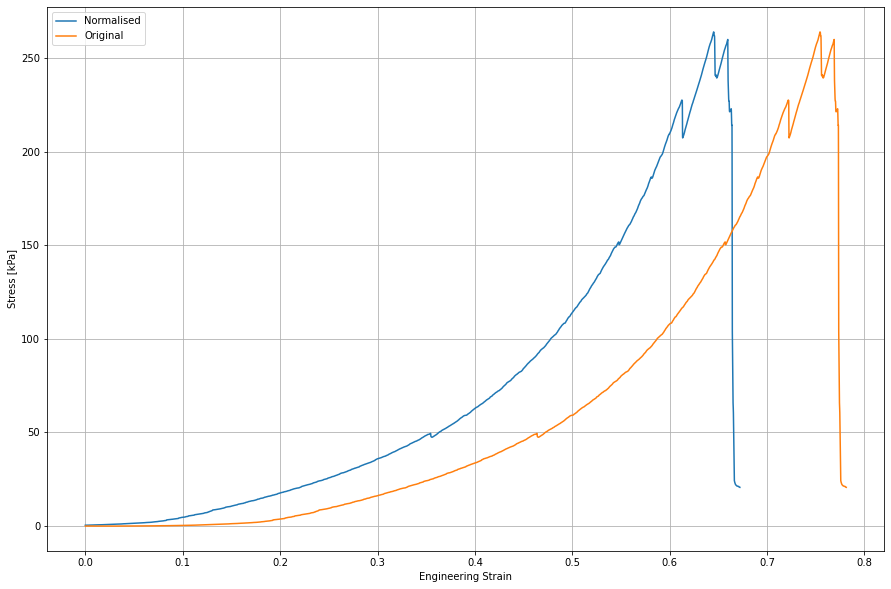

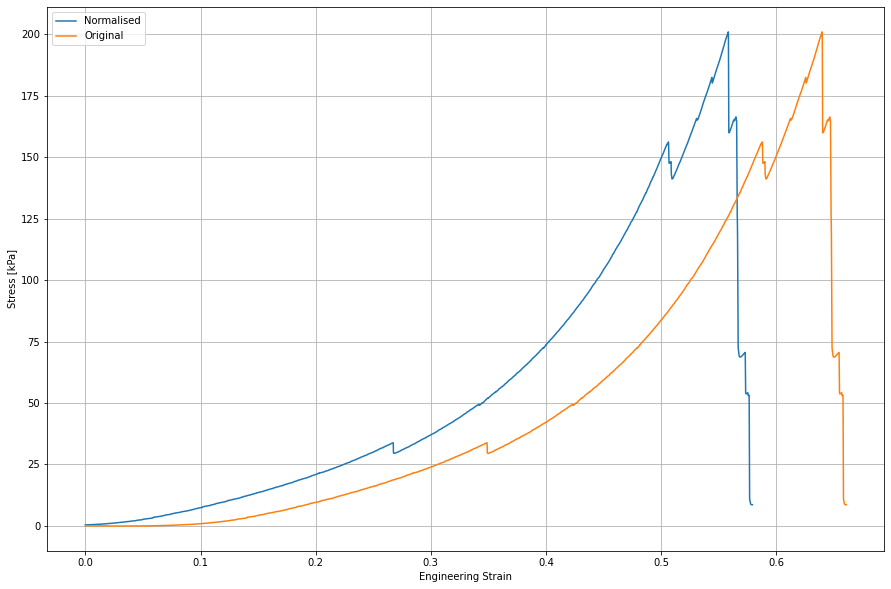

In [16]:
ax = GelMA16_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA16.plot(ax = ax, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax1 = GelMA17_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA17.plot(ax = ax1, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax2 = GelMA18_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA18.plot(ax = ax2, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax3 = GelMA19_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA19.plot(ax = ax3, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
plt.show()

ax4 = GelMA20_cut.plot(y= 'Stress [kPa]', x = 'Strain Normalised', kind = 'line', label = 'Normalised', figsize =(15,10))
GelMA20.plot(ax = ax4, y = 'Stress [kPa]', ylabel = "Stress [kPa]", x = 'Engineering Strain', label  = 'Original')
plt.grid()
#plt.savefig("GelMA only.png")
plt.show()


## All Graphs of GelMA only (Normalised)_Non-max-cut 

### Force Stroke Plots (All)_Non-cut

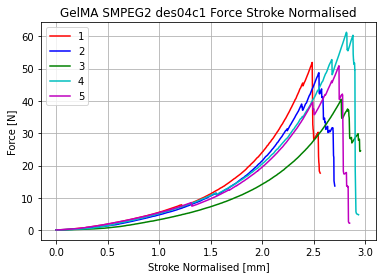

In [18]:
plt.plot(GelMA16_cut['Stroke Normalised'],GelMA16_cut['Force [N]'],color = 'r')
plt.plot(GelMA17_cut['Stroke Normalised'],GelMA17_cut['Force [N]'],color = 'b')
plt.plot(GelMA18_cut['Stroke Normalised'],GelMA18_cut['Force [N]'],color = 'g')
plt.plot(GelMA19_cut['Stroke Normalised'],GelMA19_cut['Force [N]'],color = 'c')
plt.plot(GelMA20_cut['Stroke Normalised'],GelMA20_cut['Force [N]'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 des04c1 Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA des04c1_FS_Non-max-cut.png")
plt.show()


### Stress Strain Plots (All)_Non-cut

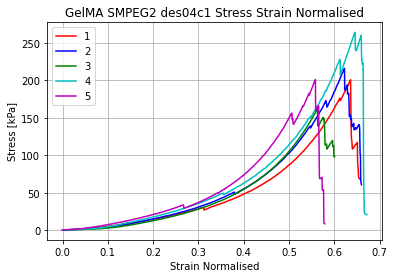

In [19]:
plt.plot(GelMA16_cut['Strain Normalised'],GelMA16_cut['Stress [kPa]'],color = 'r')
plt.plot(GelMA17_cut['Strain Normalised'],GelMA17_cut['Stress [kPa]'],color = 'b')
plt.plot(GelMA18_cut['Strain Normalised'],GelMA18_cut['Stress [kPa]'],color = 'g')
plt.plot(GelMA19_cut['Strain Normalised'],GelMA19_cut['Stress [kPa]'],color = 'c')
plt.plot(GelMA20_cut['Strain Normalised'],GelMA20_cut['Stress [kPa]'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 des04c1 Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA des04c1_SS_Non-max-cut.png")
plt.show()


#norm_GelMA_Only = {'GelMA31_norm':GelMA31_cut['Strain Normalised'],
#                   'GelMA32_norm':GelMA32_cut['Strain Normalised'],
#                   'GelMA33_norm':GelMA33_cut['Strain Normalised'],
#                   'GelM34_norm':GelMA34_cut['Strain Normalised'],
#                   'GelMA35_norm':GelMA35_cut['Strain Normalised']}

#df_only = pd.DataFrame(norm_GelMA_Only)

#print(df_only)

In [20]:
GelMA20_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised
2406,24.06,0.101089,0.400967,0.081497,399.472844,0.399473,0.000000,0.000000
2407,24.07,0.102520,0.401100,0.081524,405.125715,0.405126,0.000027,0.000133
2408,24.08,0.101725,0.401267,0.081558,401.985319,0.401985,0.000061,0.000300
2409,24.09,0.100374,0.401433,0.081592,396.646211,0.396646,0.000095,0.000467
2415,24.15,0.100931,0.402433,0.081795,398.844527,0.398845,0.000298,0.001467
...,...,...,...,...,...,...,...,...
19502,195.02,2.177397,3.250300,0.660630,8604.365159,8.604365,0.579133,2.849333
19503,195.03,2.178033,3.250500,0.660671,8606.878424,8.606878,0.579173,2.849533
19504,195.04,2.178748,3.250667,0.660705,8609.703871,8.609704,0.579207,2.849700
19505,195.05,2.179305,3.250733,0.660718,8611.904954,8.611905,0.579221,2.849766


## Max cutting

### GelM16 Force and Stress

In [21]:
maxForceIndex16 = float(GelMA16_cut['Force [N]'].idxmax()) #position
maxStrokeIndex16 = float(GelMA16_cut['Stroke [mm]'].idxmax())

GelMA16_cut_max_FS = GelMA16_cut.loc[0:maxForceIndex16, 'Force [N]']

GelMA16_cut['Force Cut Max FS'] = GelMA16_cut_max_FS
GelMA16_cut

##Stress

maxStressIndex16 = float(GelMA16_cut['Stress [kPa]'].idxmax())
maxStrainIndex16 = float(GelMA16_cut['Strain Normalised'].idxmax())
 
GelMA16_cut_max_SS = GelMA16_cut.loc[0:maxStressIndex16, 'Stress [kPa]']

GelMA16_cut['Stress Cut Max SS'] = GelMA16_cut_max_SS

GelMA16_cut

#GelMA16_cut.drop('Stroke Normalised Max FS', axis=1, inplace=True)
#GelMA16_cut.drop('Strain Normalised Max SS', axis=1, inplace=True)

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/1415309154.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA16_cut['Force Cut Max FS'] = GelMA16_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/1415309154.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA16_cut['Stress Cut Max SS'] = GelMA16_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
5119,51.19,0.100772,0.853133,0.218193,389.918380,0.389918,0.000000,0.000000,0.100772,0.389918
5120,51.20,0.100772,0.853300,0.218235,389.918380,0.389918,0.000043,0.000167,0.100772,0.389918
5126,51.26,0.100374,0.854333,0.218500,388.380709,0.388381,0.000307,0.001200,0.100374,0.388381
5127,51.27,0.101089,0.854500,0.218542,391.148439,0.391148,0.000350,0.001367,0.101089,0.391148
5128,51.28,0.101169,0.854667,0.218585,391.456051,0.391456,0.000392,0.001533,0.101169,0.391456
...,...,...,...,...,...,...,...,...,...,...
20504,205.04,17.681120,3.417300,0.873990,68414.053804,68.414054,0.655797,2.564167,NaN,NaN
20505,205.05,17.674130,3.417500,0.874041,68387.007201,68.387007,0.655848,2.564367,NaN,NaN
20506,205.06,17.667850,3.417667,0.874084,68362.707821,68.362708,0.655891,2.564534,NaN,NaN
20507,205.07,17.663160,3.417767,0.874109,68344.560672,68.344561,0.655917,2.564634,NaN,NaN


### GelMA17 Force and Stress

In [22]:
maxForceIndex17 = float(GelMA17_cut['Force [N]'].idxmax()) #position
maxStrokeIndex17 = float(GelMA17_cut['Stroke [mm]'].idxmax())

GelMA17_cut_max_FS = GelMA17_cut.loc[0:maxForceIndex17, 'Force [N]']

GelMA17_cut['Force Cut Max FS'] = GelMA17_cut_max_FS
GelMA17_cut

##Stress

maxStressIndex17 = float(GelMA17_cut['Stress [kPa]'].idxmax())
maxStrainIndex17 = float(GelMA17_cut['Strain Normalised'].idxmax())
 
GelMA17_cut_max_SS = GelMA17_cut.loc[0:maxStressIndex17, 'Stress [kPa]']

GelMA17_cut['Stress Cut Max SS'] = GelMA17_cut_max_SS

GelMA17_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/4002289200.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA17_cut['Force Cut Max FS'] = GelMA17_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/4002289200.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA17_cut['Stress Cut Max SS'] = GelMA17_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2444,24.44,0.100136,0.407333,0.099350,443.772193,0.443772,0.000000,0.000000,0.100136,0.443772
2445,24.45,0.100295,0.407500,0.099390,444.476390,0.444476,0.000041,0.000167,0.100295,0.444476
2446,24.46,0.100136,0.407633,0.099423,443.772193,0.443772,0.000073,0.000300,0.100136,0.443772
2447,24.47,0.100295,0.407800,0.099463,444.476390,0.444476,0.000114,0.000467,0.100295,0.444476
2448,24.48,0.100772,0.407933,0.099496,446.589870,0.446590,0.000146,0.000600,0.100772,0.446590
...,...,...,...,...,...,...,...,...,...,...
18679,186.79,13.728700,3.113167,0.759309,60841.530226,60.841530,0.659959,2.705834,NaN,NaN
18680,186.80,13.714310,3.113367,0.759358,60777.758010,60.777758,0.660008,2.706034,NaN,NaN
18681,186.81,13.699930,3.113500,0.759390,60714.030111,60.714030,0.660041,2.706167,NaN,NaN
18682,186.82,13.685540,3.113600,0.759415,60650.257896,60.650258,0.660065,2.706267,NaN,NaN


### GelMA18 Force and Stress

In [23]:
maxForceIndex18 = float(GelMA18_cut['Force [N]'].idxmax()) #position
maxStrokeIndex18 = float(GelMA18_cut['Stroke [mm]'].idxmax())

GelMA18_cut_max_FS = GelMA18_cut.loc[0:maxForceIndex18, 'Force [N]']

GelMA18_cut['Force Cut Max FS'] = GelMA18_cut_max_FS
GelMA18_cut

##Stress

maxStressIndex18 = float(GelMA18_cut['Stress [kPa]'].idxmax())
maxStrainIndex18 = float(GelMA18_cut['Strain Normalised'].idxmax())
 
GelMA18_cut_max_SS = GelMA18_cut.loc[0:maxStressIndex18, 'Stress [kPa]']

GelMA18_cut['Stress Cut Max SS'] = GelMA18_cut_max_SS

GelMA18_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/2228676617.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA18_cut['Force Cut Max FS'] = GelMA18_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/2228676617.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA18_cut['Stress Cut Max SS'] = GelMA18_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
4478,44.78,0.101328,0.746267,0.151680,406.278426,0.406278,0.000000,0.000000,0.101328,0.406278
4479,44.79,0.102123,0.746467,0.151721,409.464809,0.409465,0.000041,0.000200,0.102123,0.409465
4480,44.80,0.101089,0.746633,0.151755,405.322551,0.405323,0.000075,0.000367,0.101089,0.405323
4488,44.88,0.100136,0.747933,0.152019,401.498652,0.401499,0.000339,0.001667,0.100136,0.401499
4496,44.96,0.100533,0.749267,0.152290,403.092043,0.403092,0.000610,0.003000,0.100533,0.403092
...,...,...,...,...,...,...,...,...,...,...
22212,222.12,24.520870,3.701967,0.752432,98317.447310,98.317447,0.600752,2.955700,NaN,NaN
22213,222.13,24.525640,3.702133,0.752466,98336.572824,98.336573,0.600786,2.955866,NaN,NaN
22214,222.14,24.531050,3.702300,0.752500,98358.264444,98.358264,0.600820,2.956033,NaN,NaN
22215,222.15,24.538200,3.702400,0.752520,98386.932666,98.386933,0.600840,2.956133,NaN,NaN


### GelMA19 Force and Stress

In [24]:
maxForceIndex19 = float(GelMA19_cut['Force [N]'].idxmax()) #position
maxStrokeIndex19 = float(GelMA19_cut['Stroke [mm]'].idxmax())

GelMA19_cut_max_FS = GelMA19_cut.loc[0:maxForceIndex19, 'Force [N]']

GelMA19_cut['Force Cut Max FS'] = GelMA19_cut_max_FS
GelMA19_cut

##Stress

maxStressIndex19 = float(GelMA19_cut['Stress [kPa]'].idxmax())
maxStrainIndex19 = float(GelMA19_cut['Strain Normalised'].idxmax())
 
GelMA19_cut_max_SS = GelMA19_cut.loc[0:maxStressIndex19, 'Stress [kPa]']

GelMA19_cut['Stress Cut Max SS'] = GelMA19_cut_max_SS

GelMA19_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/665903343.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA19_cut['Force Cut Max FS'] = GelMA19_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/665903343.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA19_cut['Stress Cut Max SS'] = GelMA19_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2865,28.65,0.100533,0.477433,0.109252,433.683906,0.433684,0.000000,0.000000,0.100533,0.433684
2866,28.66,0.101089,0.477600,0.109291,436.083694,0.436084,0.000038,0.000167,0.101089,0.436084
2867,28.67,0.101725,0.477767,0.109329,438.826432,0.438826,0.000076,0.000333,0.101725,0.438826
2868,28.68,0.102043,0.477933,0.109367,440.197801,0.440198,0.000114,0.000500,0.102043,0.440198
2869,28.69,0.101725,0.478100,0.109405,438.826432,0.438826,0.000153,0.000667,0.101725,0.438826
...,...,...,...,...,...,...,...,...,...,...
20483,204.83,4.810095,3.413800,0.781190,20749.969060,20.749969,0.671937,2.936367,NaN,NaN
20484,204.84,4.805008,3.414000,0.781236,20728.024568,20.728025,0.671983,2.936567,NaN,NaN
20485,204.85,4.800002,3.414167,0.781274,20706.429496,20.706429,0.672021,2.936734,NaN,NaN
20486,204.86,4.795710,3.414267,0.781297,20687.914505,20.687915,0.672044,2.936834,NaN,NaN


### GelMA20 Force and Stress 

In [25]:
maxForceIndex20 = float(GelMA20_cut['Force [N]'].idxmax()) #position
maxStrokeIndex20 = float(GelMA20_cut['Stroke [mm]'].idxmax())

GelMA20_cut_max_FS = GelMA20_cut.loc[0:maxForceIndex20, 'Force [N]']

GelMA20_cut['Force Cut Max FS'] = GelMA20_cut_max_FS
GelMA20_cut

##Stress

maxStressIndex20 = float(GelMA20_cut['Stress [kPa]'].idxmax())
maxStrainIndex20 = float(GelMA20_cut['Strain Normalised'].idxmax())
 
GelMA20_cut_max_SS = GelMA20_cut.loc[0:maxStressIndex20, 'Stress [kPa]']

GelMA20_cut['Stress Cut Max SS'] = GelMA20_cut_max_SS

GelMA20_cut

/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/2585792120.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA20_cut['Force Cut Max FS'] = GelMA20_cut_max_FS
/var/folders/97/y1n8_jns6rl_dk0yr67c2ws00000gn/T/ipykernel_2045/2585792120.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GelMA20_cut['Stress Cut Max SS'] = GelMA20_cut_max_SS


,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2406,24.06,0.101089,0.400967,0.081497,399.472844,0.399473,0.000000,0.000000,0.101089,0.399473
2407,24.07,0.102520,0.401100,0.081524,405.125715,0.405126,0.000027,0.000133,0.102520,0.405126
2408,24.08,0.101725,0.401267,0.081558,401.985319,0.401985,0.000061,0.000300,0.101725,0.401985
2409,24.09,0.100374,0.401433,0.081592,396.646211,0.396646,0.000095,0.000467,0.100374,0.396646
2415,24.15,0.100931,0.402433,0.081795,398.844527,0.398845,0.000298,0.001467,0.100931,0.398845
...,...,...,...,...,...,...,...,...,...,...
19502,195.02,2.177397,3.250300,0.660630,8604.365159,8.604365,0.579133,2.849333,NaN,NaN
19503,195.03,2.178033,3.250500,0.660671,8606.878424,8.606878,0.579173,2.849533,NaN,NaN
19504,195.04,2.178748,3.250667,0.660705,8609.703871,8.609704,0.579207,2.849700,NaN,NaN
19505,195.05,2.179305,3.250733,0.660718,8611.904954,8.611905,0.579221,2.849766,NaN,NaN


In [26]:
GelMA20_cut

,Time [sec],Force [N],Stroke [mm],Engineering Strain,Stress [Pa],Stress [kPa],Strain Normalised,Stroke Normalised,Force Cut Max FS,Stress Cut Max SS
2406,24.06,0.101089,0.400967,0.081497,399.472844,0.399473,0.000000,0.000000,0.101089,0.399473
2407,24.07,0.102520,0.401100,0.081524,405.125715,0.405126,0.000027,0.000133,0.102520,0.405126
2408,24.08,0.101725,0.401267,0.081558,401.985319,0.401985,0.000061,0.000300,0.101725,0.401985
2409,24.09,0.100374,0.401433,0.081592,396.646211,0.396646,0.000095,0.000467,0.100374,0.396646
2415,24.15,0.100931,0.402433,0.081795,398.844527,0.398845,0.000298,0.001467,0.100931,0.398845
...,...,...,...,...,...,...,...,...,...,...
19502,195.02,2.177397,3.250300,0.660630,8604.365159,8.604365,0.579133,2.849333,NaN,NaN
19503,195.03,2.178033,3.250500,0.660671,8606.878424,8.606878,0.579173,2.849533,NaN,NaN
19504,195.04,2.178748,3.250667,0.660705,8609.703871,8.609704,0.579207,2.849700,NaN,NaN
19505,195.05,2.179305,3.250733,0.660718,8611.904954,8.611905,0.579221,2.849766,NaN,NaN


## Plots of Max cutting 

### Force Stroke Plots (All)_Cut

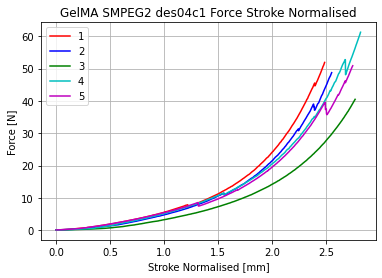

In [27]:
plt.plot(GelMA16_cut['Stroke Normalised'],GelMA16_cut['Force Cut Max FS'],color = 'r')
plt.plot(GelMA17_cut['Stroke Normalised'],GelMA17_cut['Force Cut Max FS'],color = 'b')
plt.plot(GelMA18_cut['Stroke Normalised'],GelMA18_cut['Force Cut Max FS'],color = 'g')
plt.plot(GelMA19_cut['Stroke Normalised'],GelMA19_cut['Force Cut Max FS'],color = 'c')
plt.plot(GelMA20_cut['Stroke Normalised'],GelMA20_cut['Force Cut Max FS'],color = 'm')
plt.grid()
plt.legend('12345')
plt.title('GelMA SMPEG2 des04c1 Force Stroke Normalised')
plt.xlabel('Stroke Normalised [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA des04c1_FS_Cut.png")
plt.show()

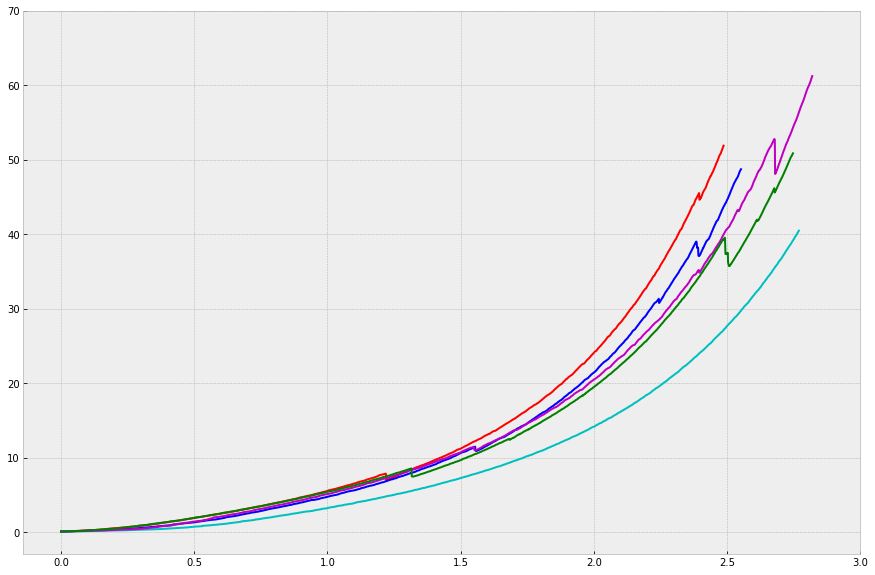

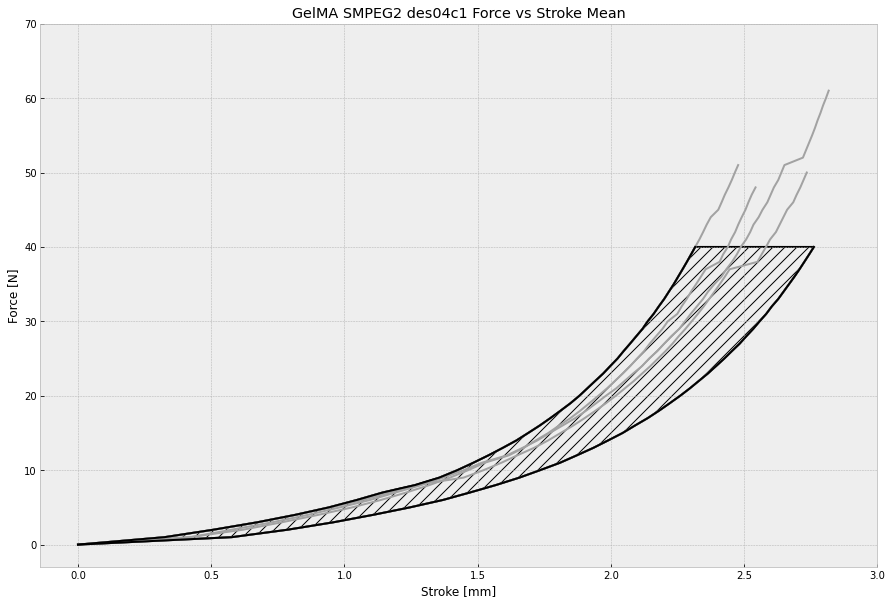

,xmin,xmax,y_common
0,0.000000,0.000000,0.000000
1,0.324788,0.577192,1.000033
2,0.507859,0.786455,2.000067
3,0.672800,0.958842,3.000100
4,0.815258,1.107698,4.000133
...,...,...,...
29995,NaN,NaN,29995.999867
29996,NaN,NaN,29996.999900
29997,NaN,NaN,29997.999933
29998,NaN,NaN,29998.999967


In [28]:
d1 = GelMA16_cut['Stroke Normalised']
d2 = GelMA17_cut['Stroke Normalised']
d3 = GelMA18_cut['Stroke Normalised']
d4 = GelMA19_cut['Stroke Normalised']
d5 = GelMA20_cut['Stroke Normalised']

y1 = GelMA16_cut['Force Cut Max FS']
y2 = GelMA17_cut['Force Cut Max FS']
y3 = GelMA18_cut['Force Cut Max FS']
y4 = GelMA19_cut['Force Cut Max FS']
y5 = GelMA20_cut['Force Cut Max FS']

y_common = np.linspace(0,30000,30000)

x1 = np.interp(y_common,y1,d1)
x2 = np.interp(y_common,y2,d2)
x3 = np.interp(y_common,y3,d3)
x4 = np.interp(y_common,y4,d4)
x5 = np.interp(y_common,y5,d5)

x = np.stack((x1,x2,x3,x4,x5))

xmax = np.max(x,axis=0)
xmin = np.min(x,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d1,y1,'red')
plt.plot(d2,y2,'blue')
plt.plot(d3,y3,'c')
plt.plot(d4,y4,'m')
plt.plot(d5,y5,'green')

plt.xticks(np.arange(0,3.1,0.5))
plt.yticks(np.arange(0,75,10))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x1,y_common,'#A2A2A2')
plt.plot(x2,y_common,'#A2A2A2')
plt.plot(x3,y_common,'#A2A2A2')
plt.plot(x4,y_common,'#A2A2A2')
plt.plot(x5,y_common,'#A2A2A2')

plt.plot(xmax,y_common,'black')
plt.plot(xmin,y_common,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common, xmax, xmin, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

plt.xticks(np.arange(0,3.1,0.5))
plt.yticks(np.arange(0,75,10))

plt.title('GelMA SMPEG2 des04c1 Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA des04c1_FS_Cut_Mean.png")

plt.show()

GelMA_des04c1_FS = {'xmin':xmin,
                  'xmax':xmax,
                'y_common':y_common}

GelMA_des04c1_FS_M = pd.DataFrame(GelMA_des04c1_FS) 

GelMA_des04c1_FS_M

#GelMA_des04c1_FS_M.to_csv('GelMA_des04c1_FS_M.csv')

### Stress Strain Plots (All)_Cut

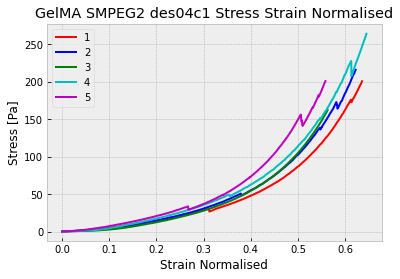

In [31]:
plt.plot(GelMA16_cut['Strain Normalised'],GelMA16_cut['Stress Cut Max SS'],color = 'r')
plt.plot(GelMA17_cut['Strain Normalised'],GelMA17_cut['Stress Cut Max SS'],color = 'b')
plt.plot(GelMA18_cut['Strain Normalised'],GelMA18_cut['Stress Cut Max SS'],color = 'g')
plt.plot(GelMA19_cut['Strain Normalised'],GelMA19_cut['Stress Cut Max SS'],color = 'c')
plt.plot(GelMA20_cut['Strain Normalised'],GelMA20_cut['Stress Cut Max SS'],color = 'm')
plt.grid(visible = True)
plt.legend('12345')
plt.title('GelMA SMPEG2 des04c1 Stress Strain Normalised')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA des04c1_SS_Cut.png")
plt.show()

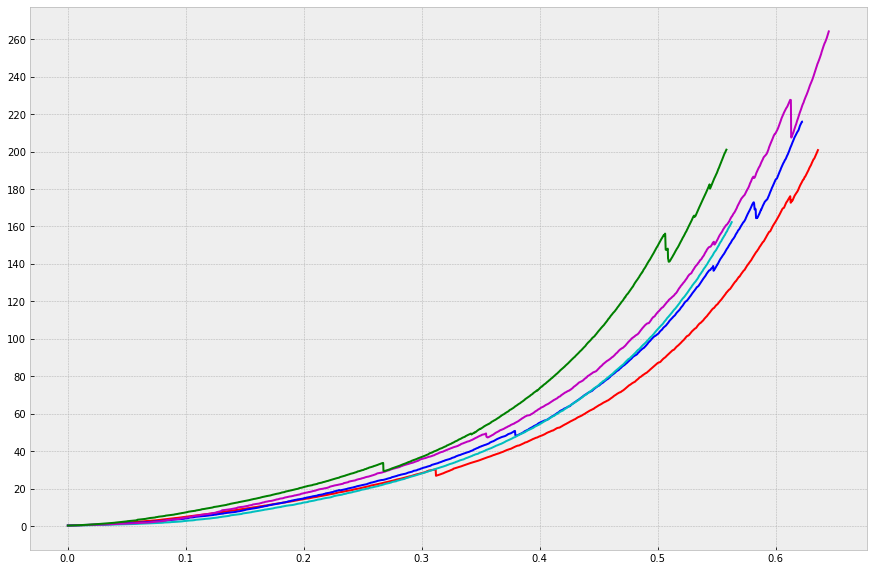

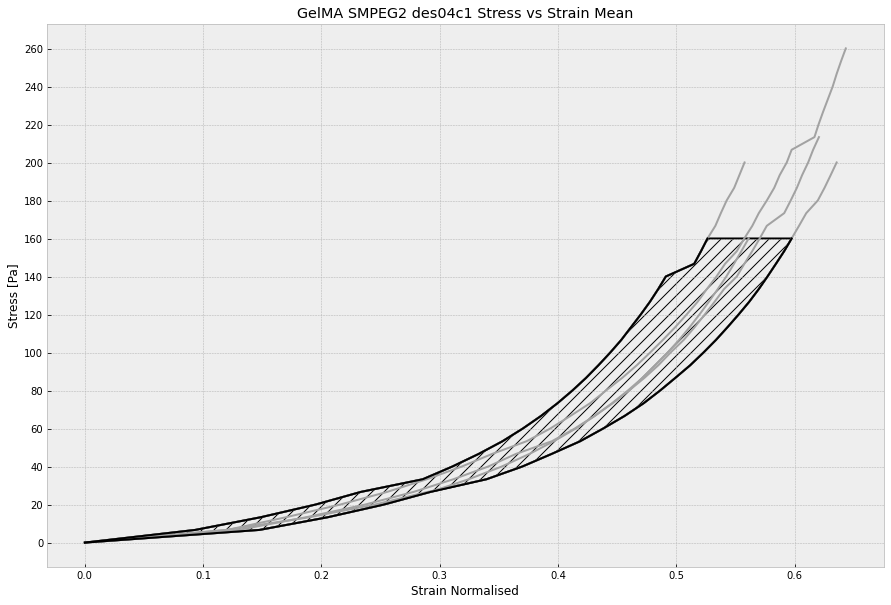

,xmin,xmax,y_common
0,0.000000,0.000000,0.000000
1,0.093260,0.147594,6.668890
2,0.148598,0.205275,13.337779
3,0.194932,0.252708,20.006669
4,0.233268,0.292162,26.675559
...,...,...,...
2995,NaN,NaN,19973.324441
2996,NaN,NaN,19979.993331
2997,NaN,NaN,19986.662221
2998,NaN,NaN,19993.331110


In [34]:
d6 = GelMA16_cut['Strain Normalised']
d7 = GelMA17_cut['Strain Normalised']
d8 = GelMA18_cut['Strain Normalised']
d9 = GelMA19_cut['Strain Normalised']
d10 = GelMA20_cut['Strain Normalised']

y6 = GelMA16_cut['Stress Cut Max SS']
y7 = GelMA17_cut['Stress Cut Max SS']
y8 = GelMA18_cut['Stress Cut Max SS']
y9 = GelMA19_cut['Stress Cut Max SS']
y10 = GelMA20_cut['Stress Cut Max SS']

#y_common_2 = np.linspace(0,2000000,30000) #Pa
y_common_2 = np.linspace(0,20000,3000) #kPa

x6 = np.interp(y_common_2,y6,d6)
x7 = np.interp(y_common_2,y7,d7)
x8 = np.interp(y_common_2,y8,d8)
x9 = np.interp(y_common_2,y9,d9)
x10 = np.interp(y_common_2,y10,d10)

x_2 = np.stack((x6,x7,x8,x9,x10))

xmax_2 = np.max(x_2,axis=0)
xmin_2 = np.min(x_2,axis=0)

%matplotlib inline
plt.style.use('bmh')
fig = plt.figure(figsize=(15,10))

plt.plot(d6,y6,'red')
plt.plot(d7,y7,'blue')
plt.plot(d8,y8,'c')
plt.plot(d9,y9,'m')
plt.plot(d10,y10,'green')

#plt.xticks(np.arange(0,0.71,0.1))
#plt.yticks(np.arange(0,280100,20000))

plt.xticks(np.arange(0,0.65,0.1))
plt.yticks(np.arange(0,280,20))

plt.show()



fig = plt.figure(figsize=(15,10))

plt.plot(x6,y_common_2,'#A2A2A2')
plt.plot(x7,y_common_2,'#A2A2A2')
plt.plot(x8,y_common_2,'#A2A2A2')
plt.plot(x9,y_common_2,'#A2A2A2')
plt.plot(x10,y_common_2,'#A2A2A2')

plt.plot(xmax_2,y_common_2,'black')
plt.plot(xmin_2,y_common_2,'black')

plt.rcParams['hatch.color'] = 'black'
plt.fill_betweenx(y_common_2, xmax_2, xmin_2, facecolor='none', hatch ='//', edgecolor='black', linewidth=2)

#plt.xticks(np.arange(0,0.71,0.1))
#plt.yticks(np.arange(0,280100,20000))

plt.xticks(np.arange(0,0.65,0.1))
plt.yticks(np.arange(0,280,20))

plt.title('GelMA SMPEG2 des04c1 Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA des04c1_SS_Cut_Mean.png")

plt.show()

GelMA_des04c1_SS = {'xmin':xmin_2,
                  'xmax':xmax_2,
                'y_common':y_common_2}

GelMA_des04c1_SS_M = pd.DataFrame(GelMA_des04c1_SS) 

GelMA_des04c1_SS_M

#GelMA_des04c1_SS_M.to_csv('GelMA_des04c1_SS_M.csv')

## Mean of the samples 

### Force_stroke Mean 

In [36]:
All_GelMA_force = {'GelMA16':GelMA16_cut['Force Cut Max FS'], 
                     'GelMA17':GelMA17_cut['Force Cut Max FS'], 
                     'GelMA18':GelMA18_cut['Force Cut Max FS'], 
                     'GelMA19':GelMA19_cut['Force Cut Max FS'],
                    'GelMA20':GelMA20_cut['Force Cut Max FS']}

All_GelMA_stroke = {'GelMA16':GelMA16_cut['Stroke Normalised'], 
                     'GelMA17':GelMA17_cut['Stroke Normalised'], 
                     'GelMA18':GelMA18_cut['Stroke Normalised'], 
                     'GelMA19':GelMA19_cut['Stroke Normalised'],
                    'GelMA20':GelMA20_cut['Stroke Normalised']}

All_GelMA_force
All_GelMA_stroke

df4_force = pd.DataFrame (data = All_GelMA_force)
df4_stroke = pd.DataFrame (data = All_GelMA_stroke)

from numpy import array
from math import nan, isnan

#df4_force
#df4_force.to_csv('df4_force_des04c1.csv')

#F1.to_csv('F1_des04c1.csv')
#Strk1.to_csv('Strk1_des04c1.csv')

df4_force['s16'] = df4_stroke['GelMA16']
df4_force['s17'] = df4_stroke['GelMA17']
df4_force['s18'] = df4_stroke['GelMA18']
df4_force['s19'] = df4_stroke['GelMA19']
df4_force['s20'] = df4_stroke['GelMA20']

df4_force

,GelMA16,GelMA17,GelMA18,GelMA19,GelMA20,s16,s17,s18,s19,s20
2406,NaN,NaN,NaN,NaN,0.101089,NaN,NaN,NaN,NaN,0.000000
2407,NaN,NaN,NaN,NaN,0.102520,NaN,NaN,NaN,NaN,0.000133
2408,NaN,NaN,NaN,NaN,0.101725,NaN,NaN,NaN,NaN,0.000300
2409,NaN,NaN,NaN,NaN,0.100374,NaN,NaN,NaN,NaN,0.000467
2415,NaN,NaN,NaN,NaN,0.100931,NaN,NaN,NaN,NaN,0.001467
...,...,...,...,...,...,...,...,...,...,...
22212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955700,NaN,NaN
22213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.955866,NaN,NaN
22214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.956033,NaN,NaN
22215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.956133,NaN,NaN


In [38]:
#Force

G16 = [x for x in df4_force['GelMA16'] if isnan(x) == False]
G17 = [x for x in df4_force['GelMA17'] if isnan(x) == False]
G18 = [x for x in df4_force['GelMA18'] if isnan(x) == False]
G19 = [x for x in df4_force['GelMA19'] if isnan(x) == False]
G20 = [x for x in df4_force['GelMA20'] if isnan(x) == False]

#Stroke

G21 = [x for x in df4_force['s16'] if isnan(x) == False]
G22 = [x for x in df4_force['s17'] if isnan(x) == False]
G23 = [x for x in df4_force['s18'] if isnan(x) == False]
G24 = [x for x in df4_force['s19'] if isnan(x) == False]
G25 = [x for x in df4_force['s20'] if isnan(x) == False]


dfG16 = pd.DataFrame(G16)
dfG17 = pd.DataFrame(G17)
dfG18 = pd.DataFrame(G18)
dfG19 = pd.DataFrame(G19)
dfG20 = pd.DataFrame(G20)

dfG21 = pd.DataFrame(G21)
dfG22 = pd.DataFrame(G22)
dfG23 = pd.DataFrame(G23)
dfG24 = pd.DataFrame(G24)
dfG25 = pd.DataFrame(G25)


dFONLY = dfG16
dFONLY['17'] = dfG17
dFONLY['18'] = dfG18
dFONLY['19'] = dfG19
dFONLY['20'] = dfG20

dFONLY['21'] = dfG21
dFONLY['22'] = dfG22
dFONLY['23'] = dfG23
dFONLY['24'] = dfG24
dFONLY['25'] = dfG25



dFONLY.columns = ['F16','F17','F18','F19','F20','S16','S17','S18','S19','S20']
dFONLY

df4 = dFONLY[['F16','F17','F18','F19','F20']]
ds4 = dFONLY[['S16','S17','S18','S19','S20']]

dFONLY

,F16,F17,F18,F19,F20,S16,S17,S18,S19,S20
0,0.100772,0.100136,0.101328,0.100533,0.101089,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.100772,0.100295,0.102123,0.101089,0.102520,0.000167,0.000167,0.000200,0.000167,0.000133
2,0.100374,0.100136,0.101089,0.101725,0.101725,0.001200,0.000300,0.000367,0.000333,0.000300
3,0.101089,0.100295,0.100136,0.102043,0.100374,0.001367,0.000467,0.001667,0.000500,0.000467
4,0.101169,0.100772,0.100533,0.101725,0.100931,0.001533,0.000600,0.003000,0.000667,0.001467
...,...,...,...,...,...,...,...,...,...,...
14909,51.819960,43.594040,27.223110,39.872090,39.278350,2.485700,2.485167,2.487733,2.484867,2.486300
14910,51.837520,43.608190,27.229150,39.879800,39.283040,2.485867,2.485334,2.487866,2.485034,2.486466
14911,51.854770,43.623370,27.234630,39.887590,39.287730,2.486000,2.485467,2.488033,2.485200,2.486633
14912,51.871700,43.639420,27.240510,39.895530,39.293690,2.486200,2.485634,2.488200,2.485334,2.486800


In [39]:
F_dF = array([df4[k] for k in df4]).mean(axis = 0)
S_dF = array([ds4[k] for k in ds4]).mean(axis = 0)


F1 = pd.DataFrame(F_dF) #force
Strk1 = pd.DataFrame(S_dF) #stroke


FStd = array(pd.DataFrame(df4).std(numeric_only = True, axis = 1))
F_nan_std = [x for x in FStd if isnan(x) == False]

StrkStd = array(pd.DataFrame(ds4).std(numeric_only = True, axis = 1))
Strk_nan_std = [x for x in StrkStd if isnan(x) == False]


F1['Std'] = pd.DataFrame(F_nan_std)
F1.columns = ['Mean', 'Std']

Strk1['Std'] = pd.DataFrame(Strk_nan_std)
Strk1.columns = ['Mean', 'Std']



F1['Error1'] = F1['Mean'] - F1['Std']
F1['Error2'] = F1['Mean'] + F1['Std']


Strk1['Error1'] = Strk1['Mean'] - Strk1['Std']
Strk1['Error2'] = Strk1['Mean'] + Strk1['Std']


F1, Strk1

(            Mean       Std     Error1     Error2
 0       0.100772  0.000467   0.100305   0.101238
 1       0.101360  0.000933   0.100427   0.102293
 2       0.101010  0.000741   0.100269   0.101751
 3       0.100787  0.000792   0.099996   0.101579
 4       0.101026  0.000454   0.100571   0.101480
 ...          ...       ...        ...        ...
 14909  40.357510  8.885038  31.472472  49.242548
 14910  40.367540  8.889510  31.478030  49.257050
 14911  40.377618  8.894184  31.483434  49.271802
 14912  40.388170  8.898646  31.489524  49.286816
 14913  40.398742  8.902279  31.496463  49.301021
 
 [14914 rows x 4 columns],
            Mean       Std    Error1    Error2
 0      0.000000  0.000000  0.000000  0.000000
 1      0.000167  0.000024  0.000143  0.000190
 2      0.000500  0.000392  0.000108  0.000892
 3      0.000893  0.000579  0.000314  0.001472
 4      0.001453  0.000968  0.000486  0.002421
 ...         ...       ...       ...       ...
 14909  2.485953  0.001135  2.484818  2.48

### Stress_Strain Mean 

In [41]:
All_GelMA_stress = {'GelMA16':GelMA16_cut['Stress Cut Max SS'], 
                     'GelMA17':GelMA17_cut['Stress Cut Max SS'], 
                     'GelMA18':GelMA18_cut['Stress Cut Max SS'], 
                     'GelMA19':GelMA19_cut['Stress Cut Max SS'],
                    'GelMA20':GelMA20_cut['Stress Cut Max SS']}

All_GelMA_strain = {'GelMA16':GelMA16_cut['Strain Normalised'], 
                     'GelMA17':GelMA17_cut['Strain Normalised'], 
                     'GelMA18':GelMA18_cut['Strain Normalised'], 
                     'GelMA19':GelMA19_cut['Strain Normalised'],
                    'GelMA20':GelMA20_cut['Strain Normalised']} 

All_GelMA_stress
All_GelMA_strain

df4_stress = pd.DataFrame (data = All_GelMA_stress)
df4_strain = pd.DataFrame (data = All_GelMA_strain)

#Strn1

#S1.to_csv('S1_des04c1.csv')
#Strn1.to_csv('Strn1_des04c1.csv')



df4_stress['sn16'] = df4_strain['GelMA16']
df4_stress['sn17'] = df4_strain['GelMA17']
df4_stress['sn18'] = df4_strain['GelMA18']
df4_stress['sn19'] = df4_strain['GelMA19']
df4_stress['sn20'] = df4_strain['GelMA20']

df4_stress

,GelMA16,GelMA17,GelMA18,GelMA19,GelMA20,sn16,sn17,sn18,sn19,sn20
2406,NaN,NaN,NaN,NaN,0.399473,NaN,NaN,NaN,NaN,0.000000
2407,NaN,NaN,NaN,NaN,0.405126,NaN,NaN,NaN,NaN,0.000027
2408,NaN,NaN,NaN,NaN,0.401985,NaN,NaN,NaN,NaN,0.000061
2409,NaN,NaN,NaN,NaN,0.396646,NaN,NaN,NaN,NaN,0.000095
2415,NaN,NaN,NaN,NaN,0.398845,NaN,NaN,NaN,NaN,0.000298
...,...,...,...,...,...,...,...,...,...,...
22212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600752,NaN,NaN
22213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600786,NaN,NaN
22214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600820,NaN,NaN
22215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.600840,NaN,NaN


In [43]:
#Stress

G16ss = [x for x in df4_stress['GelMA16'] if isnan(x) == False]
G17ss = [x for x in df4_stress['GelMA17'] if isnan(x) == False]
G18ss = [x for x in df4_stress['GelMA18'] if isnan(x) == False]
G19ss = [x for x in df4_stress['GelMA19'] if isnan(x) == False]
G20ss = [x for x in df4_stress['GelMA20'] if isnan(x) == False]

#Strain

G21ss = [x for x in df4_stress['sn16'] if isnan(x) == False]
G22ss = [x for x in df4_stress['sn17'] if isnan(x) == False]
G23ss = [x for x in df4_stress['sn18'] if isnan(x) == False]
G24ss = [x for x in df4_stress['sn19'] if isnan(x) == False]
G25ss = [x for x in df4_stress['sn20'] if isnan(x) == False]


dfG16ss = pd.DataFrame(G16ss)
dfG17ss = pd.DataFrame(G17ss)
dfG18ss = pd.DataFrame(G18ss)
dfG19ss = pd.DataFrame(G19ss)
dfG20ss = pd.DataFrame(G20ss)

dfG21ss = pd.DataFrame(G21ss)
dfG22ss = pd.DataFrame(G22ss)
dfG23ss = pd.DataFrame(G23ss)
dfG24ss = pd.DataFrame(G24ss)
dfG25ss = pd.DataFrame(G25ss)


dFONLYss = dfG16ss
dFONLYss['17'] = dfG17ss
dFONLYss['18'] = dfG18ss
dFONLYss['19'] = dfG19ss
dFONLYss['20'] = dfG20ss

dFONLYss['21'] = dfG21ss
dFONLYss['22'] = dfG22ss
dFONLYss['23'] = dfG23ss
dFONLYss['24'] = dfG24ss
dFONLYss['25'] = dfG25ss





dFONLYss.columns = ['Ss16','Ss17','Ss18','Ss19','Ss20','Sn16','Sn17','Sn18','Sn19','Sn20']
dFONLYss

dss4 = dFONLYss[['Ss16','Ss17','Ss18','Ss19','Ss20']]
dsn4 = dFONLYss[['Sn16','Sn17','Sn18','Sn19','Sn20']]

dsn4

,Sn16,Sn17,Sn18,Sn19,Sn20
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000043,0.000041,0.000041,0.000038,0.000027
2,0.000307,0.000073,0.000075,0.000076,0.000061
3,0.000350,0.000114,0.000339,0.000114,0.000095
4,0.000392,0.000146,0.000610,0.000153,0.000298
...,...,...,...,...,...
14909,0.635729,0.606138,0.505637,0.568619,0.505346
14910,0.635772,0.606179,0.505664,0.568658,0.505379
14911,0.635806,0.606211,0.505698,0.568696,0.505413
14912,0.635857,0.606252,0.505732,0.568726,0.505447


In [47]:
S_dF = array([dss4[k] for k in dss4]).mean(axis = 0)
Strn_dF = array([dsn4[k] for k in dsn4]).mean(axis = 0)


S1 = pd.DataFrame(S_dF) #stress
Strn1 = pd.DataFrame(Strn_dF) #strain

SStd = array(pd.DataFrame(dss4).std(numeric_only = True, axis = 1))
S_nan_std = [x for x in SStd if isnan(x) == False]

StrnStd = array(pd.DataFrame(dsn4).std(numeric_only = True, axis = 1))
Strn_nan_std = [x for x in StrnStd if isnan(x) == False]


S1['Std'] = pd.DataFrame(S_nan_std)
S1.columns = ['Mean', 'Std']

Strn1['Std'] = pd.DataFrame(Strn_nan_std)
Strn1.columns = ['Mean', 'Std']



S1['Error1'] = S1['Mean'] - S1['Std']
S1['Error2'] = S1['Mean'] + S1['Std']


Strn1['Error1'] = Strn1['Mean'] - Strn1['Std']
Strn1['Error2'] = Strn1['Mean'] + Strn1['Std']

S1

,Mean,Std,Error1,Error2
0,0.414625,0.023035,0.391590,0.437660
1,0.417014,0.022640,0.394374,0.439654
2,0.415657,0.024316,0.391342,0.439973
3,0.414793,0.025454,0.389340,0.440247
4,0.415762,0.025099,0.390663,0.440861
...,...,...,...,...
14909,166.014696,36.450137,129.564559,202.464833
14910,166.056029,36.468453,129.587576,202.524482
14911,166.097655,36.488230,129.609424,202.585885
14912,166.141258,36.507467,129.633791,202.648725


In [49]:
#F1.to_csv('F1_des04c1.csv')
#Strk1.to_csv('Strk1_des04c1.csv')
#S1.to_csv('S1_des04c1.csv')
#Strn1.to_csv('Strn1_des04c1.csv')

## Plotting the stress and force means

### Force_Stroke Mean plotting

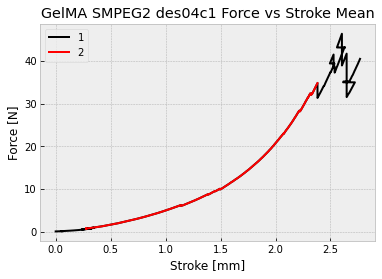

In [57]:
plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
plt.plot(GelMA_stroke_mean, F, color= 'r')
plt.grid(visible=True)
plt.legend('12')
plt.title('GelMA SMPEG2 des04c1 Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
plt.savefig("GelMA des04c1_FS Mean.png")
plt.show()

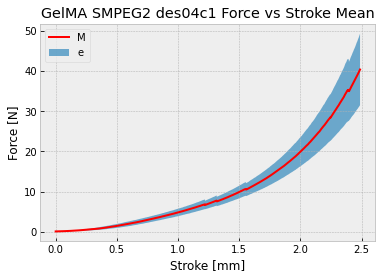

In [45]:
plt.plot(Strk1['Mean'], F1['Mean'], color= 'r')
plt.fill_between(Strk1['Mean'], F1['Error1'], F1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Mean',loc='upper left')
plt.title('GelMA SMPEG2 des04c1 Force vs Stroke Mean')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
#plt.savefig("GelMA des04c1_FS Mean_error.png")
plt.show()

### Stress_Strain Mean plotting 

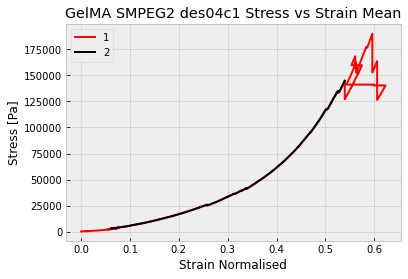

In [59]:
plt.plot(GelMA_strain_mean, GelMA_stress_mean,color = 'r')
plt.plot(GelMA_strain_mean, S,color = 'k')
plt.grid(visible=True)
plt.legend('12')
plt.title('GelMA SMPEG2 des04c1 Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
plt.savefig("GelMA des04c1_SS Mean.png")
plt.show()

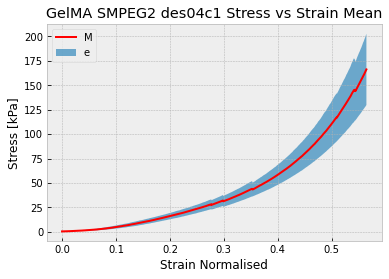

In [46]:
plt.plot(Strn1['Mean'], S1['Mean'], color= 'r')
plt.fill_between(Strn1['Mean'], S1['Error1'], S1['Error2'], alpha = 0.7)
plt.grid(visible=True)
plt.legend('Mean',loc='upper left')
plt.title('GelMA SMPEG2 des04c1 Stress vs Strain Mean')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [kPa]')
#plt.savefig("GelMA des04c1_SS Mean_error.png")
plt.show()

# Margin of Error

## Force_Stroke Margin Error

In [ ]:
def error_margin_fs (mean):
    a = 0.001/mean #1mm = 0.001m
    return (1 +- a)*mean

In [ ]:
GelMA_des04c1_Error_FS = error_margin_fs(GelMA_stroke_mean)

In [ ]:
df4_GelMA_des04c1_Er = {'GelMA Force Mean':GelMA_force_mean,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_des04c1_Error_FS}

dfF_GelMA_des04c1_Er = {'GelMA Force Mean':F,
                  'GelMA Stroke Mean':GelMA_stroke_mean,
                    'GelMA Error Margin':GelMA_des04c1_Error_FS}

GelMA_des04c1_Er = pd.DataFrame(dfF_GelMA_des04c1_Er) 

GelMA_des04c1_Er

GelMA_des04c1_Er.to_csv('GelMA_des04c1_Er.csv')

GelMA_des04c1_Er

In [ ]:
plt.plot(GelMA_stroke_mean, GelMA_force_mean,color = 'k')
plt.errorbar(GelMA_stroke_mean, GelMA_force_mean, yerr = GelMA_des04c1_Error_FS, fmt = ' ')
plt.errorbar(GelMA_stroke_mean, F, yerr = GelMA_des04c1_Error_FS, fmt = ' ', color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA SMPEG2 des04c1 Force vs Stroke Mean & Error Margin')
plt.xlabel('Stroke [mm]')
plt.ylabel('Force [N]')
plt.savefig("GelMA des04c1_FS Mean_Error.png")
plt.show()

## Stress_Strain Margin Error

In [ ]:
GelMA_D_Mean
GelMA_A_Mean

b= 0.001/GelMA_D_Mean

def error_margin_ss (force):
    from scipy import stats
    a = force/((1+2*b)*GelMA_A_Mean)
    c = force/((1-2*b)*GelMA_A_Mean)
    return (a,c)

In [ ]:
error_margin_ss(F)

In [ ]:
plt.errorbar(GelMA_strain_mean, S, yerr = error_margin_ss(F), fmt = ' ', color = '#A2A2A2', alpha = 0.5)
plt.plot(GelMA_strain_mean, S,color = 'r')

plt.grid()
plt.legend('Mean')
plt.title('GelMA SMPEG2 des04c1 Stress vs Strain Mean & Error Margin')
plt.xlabel('Strain Normalised')
plt.ylabel('Stress [Pa]')
#plt.savefig("GelMA des04c1_SS Mean_Error.png")
plt.show()